# Sleep Quality Score Prediction

## Importing Libraries and Loading Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
sleep_df=pd.read_csv("wearable_tech_sleep_quality_1.csv")

## Pre-processing and Exploratory Data Analysis

In [3]:
sleep_df.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


In [4]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [5]:
sleep_df.isnull().sum()

Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64

In [6]:
sleep_df.duplicated().sum()

0

In [7]:
sleep_df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.386641,36.535418,2.005834,7.471921,2.592946,148.260148,4.940956,0.504222,8.036684
std,19.584319,0.498727,0.983454,1.540699,2.979500,94.031760,2.032708,0.204137,2.023371
min,5.174653,35.029806,-1.019512,3.105827,1.000000,0.000000,0.000000,0.000000,0.326689
25%,57.048194,36.196879,1.352000,6.393869,1.000000,80.630719,3.489725,0.361569,6.726291
50%,70.506012,36.531539,1.999749,7.500277,1.000000,145.717293,4.890507,0.500996,8.038248
75%,82.958878,36.864441,2.660915,8.500418,2.537789,211.244685,6.399490,0.644680,9.354408
max,147.054630,38.096554,5.926238,12.364639,10.000000,400.000000,10.000000,1.000000,14.754766


## Data Visualization


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.set_theme(palette="deep")

In [10]:
##observing correlations
corr=sleep_df.corr()
corr

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
Heart_Rate_Variability,1.000000,-0.040400,0.022129,-0.013321,0.026911,-0.008619,-0.035387,0.048199,-0.016585
Body_Temperature,-0.040400,1.000000,-0.011199,-0.054698,-0.025720,0.024757,-0.001531,0.054962,0.012436
Movement_During_Sleep,0.022129,-0.011199,1.000000,0.021586,-0.064108,0.002097,-0.028713,-0.039408,0.001739
Sleep_Duration_Hours,-0.013321,-0.054698,0.021586,1.000000,0.042104,0.033951,0.011492,-0.002974,0.004894
Sleep_Quality_Score,0.026911,-0.025720,-0.064108,0.042104,1.000000,-0.721968,-0.036226,-0.076633,-0.007448
Caffeine_Intake_mg,-0.008619,0.024757,0.002097,0.033951,-0.721968,1.000000,0.013555,0.056263,0.011756
Stress_Level,-0.035387,-0.001531,-0.028713,0.011492,-0.036226,0.013555,1.000000,-0.004930,-0.001623
Bedtime_Consistency,0.048199,0.054962,-0.039408,-0.002974,-0.076633,0.056263,-0.004930,1.000000,0.026786
Light_Exposure_hours,-0.016585,0.012436,0.001739,0.004894,-0.007448,0.011756,-0.001623,0.026786,1.000000


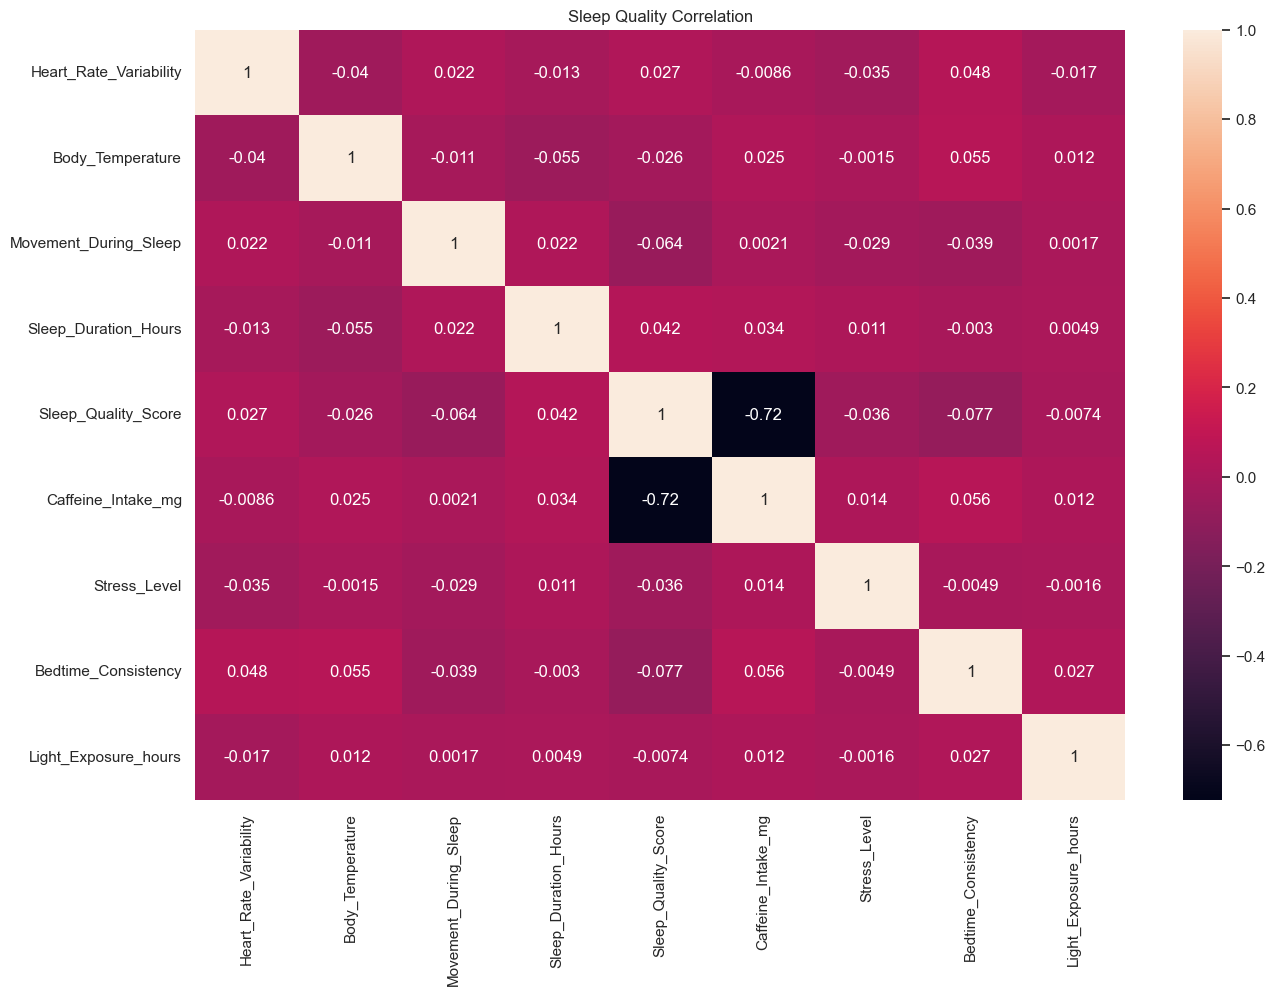

In [11]:
#heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.title("Sleep Quality Correlation")
plt.show()


array([[<Axes: title={'center': 'Heart_Rate_Variability'}>,
        <Axes: title={'center': 'Body_Temperature'}>,
        <Axes: title={'center': 'Movement_During_Sleep'}>],
       [<Axes: title={'center': 'Sleep_Duration_Hours'}>,
        <Axes: title={'center': 'Sleep_Quality_Score'}>,
        <Axes: title={'center': 'Caffeine_Intake_mg'}>],
       [<Axes: title={'center': 'Stress_Level'}>,
        <Axes: title={'center': 'Bedtime_Consistency'}>,
        <Axes: title={'center': 'Light_Exposure_hours'}>]], dtype=object)

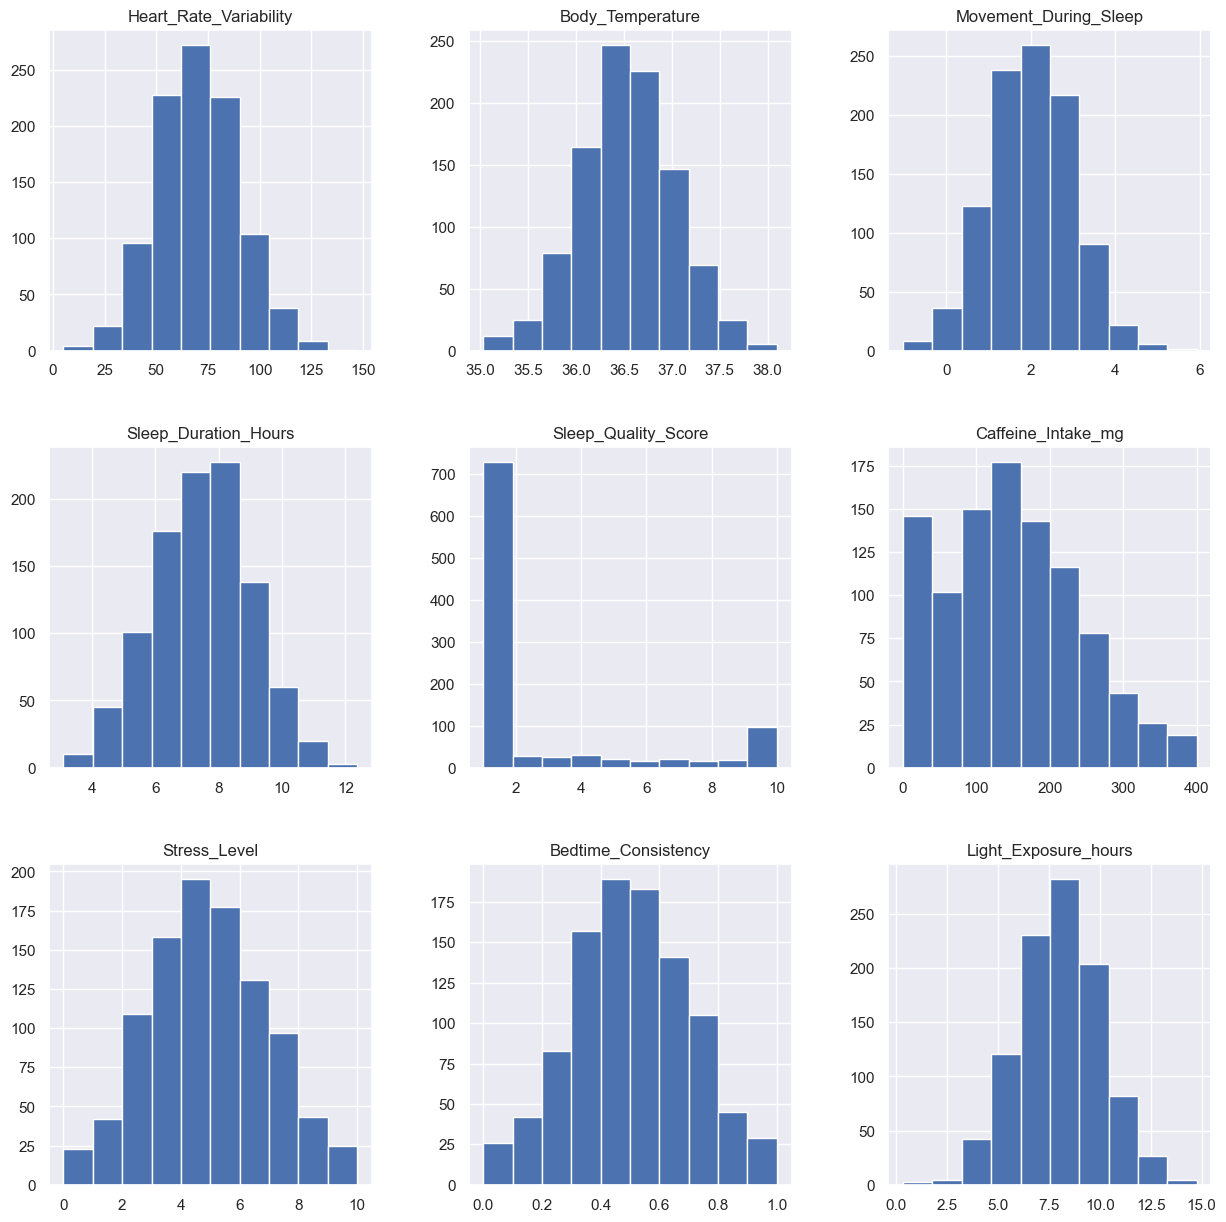

In [12]:
#visualizing data with a histogram chart
sleep_df.hist(bins=10, figsize=(15,15))

## Preparing Data Before Training

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#selecting features(x) and target(y)
y=sleep_df["Sleep_Quality_Score"]
x=sleep_df.drop("Sleep_Quality_Score", axis=1)

In [15]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

## Model Training and Performance Assesing

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
#model building and training
rf=RandomForestRegressor()
model=rf.fit(x_train, y_train)

In [18]:
y_pred=model.predict(x_test)

In [19]:
#model performance evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R^2: {r2}")

MSE: 0.06648647489501107, MAE: 0.11098092790542254, R^2: 0.992639521302994
